In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df.Embarked = train_df['Embarked'].fillna(method = 'ffill')

In [8]:
s = train_df['Age'].value_counts(normalize = True)
missing_age = train_df['Age'].isnull()
train_df.loc[missing_age,"Age"] = np.random.choice(s.index,size = len(train_df[missing_age]), p=s.values)

In [9]:
train_df["Age"].isnull().sum()

0

In [10]:
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.',expand=False)

train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [11]:
train_df[['Title','Survived']].groupby(['Title'],as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [12]:
train_df['FamilySize'] = train_df['SibSp']+train_df['Parch']+1
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilySize']>1 ]= 0

C:\Users\CSY\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
train_df.drop(['Cabin','Ticket','Name'], axis = 1, inplace = True)

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2,0
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1,1


In [15]:
train_df.Embarked.value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [16]:
train_df['AgeBin'] = pd.cut(train_df['Age'],5)
train_df['FareBin'] = pd.qcut(train_df['Fare'],4)

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
enc = OneHotEncoder()
onehot_features = ['Title','Sex','Embarked', 'AgeBin','FareBin']
enc_res = enc.fit_transform(train_df[onehot_features])

In [19]:
onehot_added = pd.DataFrame(enc_res.toarray())

In [20]:
Y = train_df.Survived
x = train_df[['Pclass','FamilySize','IsAlone']]

In [21]:
X = pd.concat([x,onehot_added],axis = 1)
X.head()

,Pclass,FamilySize,IsAlone,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,18
0,3,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,2,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xTrain,xTest,yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
yTrain.mean(),yTest.mean()

(0.38342696629213485, 0.3854748603351955)

In [25]:
xTrain2 = xTrain.T
yTrain2 = yTrain.values.reshape(1, yTrain.size)

In [26]:
xTrain2.shape, yTrain2.shape

((22, 712), (1, 712))

In [27]:
import sys, os
sys.path.append(os.pardir)  # parent directory 
from Utils.Binary_Classification_NN import *

In [28]:
### CONSTANTS DEFINING THE MODEL ####
n_x = xTrain2.shape[0]
n_h1 = 50  # hyper parameter
n_h2 = 50  # hyper parameter
n_h3 = 20  # hyper parameter
n_y = yTrain2.shape[0]
layers_dims = [n_x, n_h1, n_h2, n_h3, n_y]
layers_dims

[22, 50, 50, 20, 1]

In [29]:
xTest2 = xTest.T
yTest2 = yTest.values.reshape(1, yTest.size)

Cost after epoch 0: 7.508120
Cost after epoch 1000: 0.854547
Cost after epoch 2000: 1.030161
Cost after epoch 3000: 0.748771
Cost after epoch 4000: 1.230886
Cost after epoch 5000: 0.816309
Cost after epoch 6000: 0.832135
Cost after epoch 7000: 0.809900
Cost after epoch 8000: 1.303707
Cost after epoch 9000: 1.068944


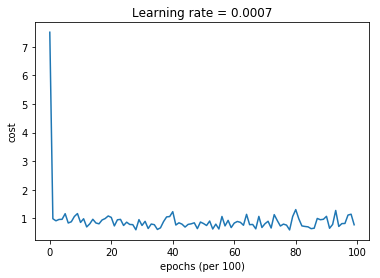

In [30]:
# with L-2 regulation 
parameters = model(xTrain2, yTrain2, layers_dims, optimizer = "adam",print_cost=True, lambd=0.95)

In [31]:
predictions_train = predict(parameters, xTrain2, yTrain2)

Accuracy: 0.8384831460674157


In [32]:
predictions_test = predict(parameters, xTest2, yTest2)

Accuracy: 0.8100558659217877


In [33]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
test_df.Fare = test_df['Fare'].fillna(method = 'ffill')

In [35]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)

test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [36]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = 1
test_df['IsAlone'].loc[test_df['FamilySize']>1 ]= 0

C:\Users\CSY\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
s2 = test_df['Age'].value_counts(normalize = True)
missing_age2 = test_df['Age'].isnull()
test_df.loc[missing_age2,"Age"] = np.random.choice(s2.index,size = len(test_df[missing_age2]), p=s2.values)

In [38]:
test_df.drop(['Cabin','Ticket','Name'], axis = 1, inplace = True)

In [39]:
test_df['AgeBin'] = pd.cut(test_df['Age'],5)
test_df['FareBin'] = pd.qcut(test_df['Fare'],4)

In [40]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeBin,FareBin
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1,1,"(30.502, 45.668]","(-0.001, 7.896]"
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2,0,"(45.668, 60.834]","(-0.001, 7.896]"
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1,1,"(60.834, 76.0]","(7.896, 14.454]"
3,895,3,male,27.0,0,0,8.6625,S,Mr,1,1,"(15.336, 30.502]","(7.896, 14.454]"
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3,0,"(15.336, 30.502]","(7.896, 14.454]"


In [41]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
AgeBin         0
FareBin        0
dtype: int64

In [42]:
enc.fit(test_df[onehot_features])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [43]:
enc_res2 = enc.transform(test_df[onehot_features])
test_onehot_added = pd.DataFrame(enc_res2.toarray())

In [44]:
x_test = test_df[['Pclass', 'FamilySize','IsAlone']]

In [45]:
test_all_x = pd.concat([x_test,test_onehot_added],axis = 1)

In [46]:
predictions = predict(parameters, test_all_x.T)

In [47]:
predictions.shape

(1, 418)

In [48]:
predictions = predictions.T

In [49]:
predictions.shape

(418, 1)

In [50]:
test_df['Survived2'] = predictions
dataframe2 = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':test_df['Survived2']})
dataframe2.to_csv("Predict.csv",index=False)